### Steel Plates Faults Dataset Multivariate

In [8]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

#Importing Steel Plates Faults Dataset
dataset = pd.read_csv('C:/Users/emnsrjm/Desktop/Courses/Machine Learning/Project/Project/Machine-Learning-Project_1/Machine-Learning-Project/classification-models/Steel Plates Faults/data/Faults.NNA',sep='\t')
data = pd.DataFrame(dataset)
print(data)
X = data.iloc[:, 0:27].values
Y = data.iloc[:, 27:34].values

        42    50   270900   270944   267  17   44   24220   76  108  ...  \
0      645   651  2538079  2538108   108  10   30   11397   84  123  ...   
1      829   835  1553913  1553931    71   8   19    7972   99  125  ...   
2      853   860   369370   369415   176  13   45   18996   99  126  ...   
3     1289  1306   498078   498335  2409  60  260  246930   37  126  ...   
4      430   441   100250   100337   630  20   87   62357   64  127  ...   
...    ...   ...      ...      ...   ...  ..  ...     ...  ...  ...  ...   
1935   249   277   325780   325796   273  54   22   35033  119  141  ...   
1936   144   175   340581   340598   287  44   24   34599  112  133  ...   
1937   145   174   386779   386794   292  40   22   37572  120  140  ...   
1938   137   170   422497   422528   419  97   47   52715  117  140  ...   
1939  1261  1281    87951    87967   103  26   22   11682  101  133  ...   

      0.8182  -0.2913  0.5822  1.3  0.1  0.2  0.3  0.4  0.5  0.6  
0     0.7931  -0.175

In [6]:
# INVERSE OF ONE HOT ENCODING
# Converting Y to single one column matrix
y = []
for i in range(Y.shape[0]):
    if Y[i,0] == 1:
        y.append("Pastry")
    elif Y[i,1] == 1:
        y.append("Z_Scratch")
    elif Y[i,2] == 1:
        y.append("K_Scatch")
    elif Y[i,3] == 1:
        y.append("Stains")
    elif Y[i,4] == 1:
        y.append("Dirtiness")
    elif Y[i,5] == 1:
        y.append("Bumps")
    else:
        y.append("Other_Faults")
        
y=np.array(y)
faults = pd.DataFrame({'faults':y})

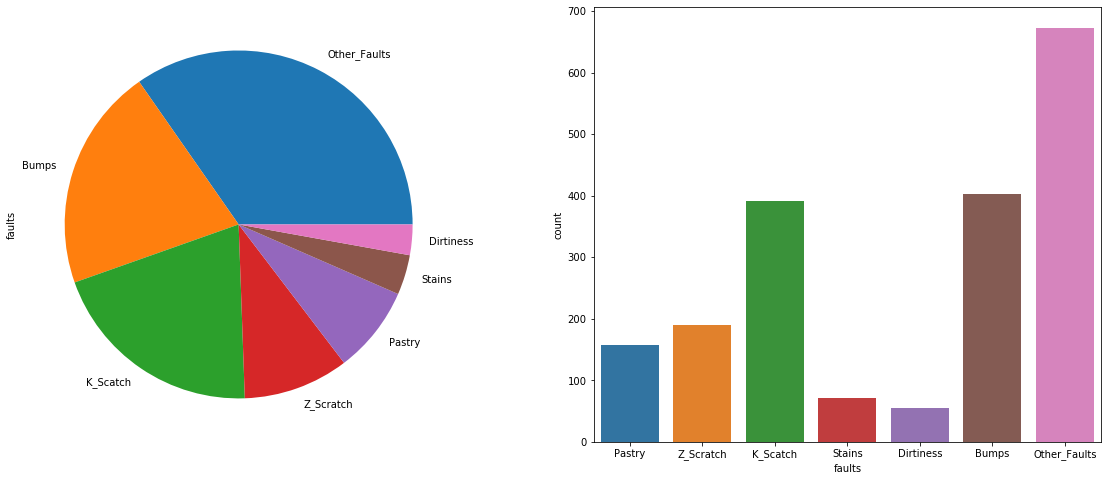

In [18]:
fig, ax=plt.subplots(1,2,figsize=(20,8))

faults['faults'].value_counts().plot.pie(ax=ax[0])
sns.countplot(x='faults', data=faults, ax=ax[1])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [11]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [12]:
# Model Accuracy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

names = ['KNeighborsClassifier','SVC', 'DecisionTreeClassifier', 'RandomForestClassifier','AdaBoostClassifier','LogisticRegression','GaussianNB','MLPClassifier']
models = [KNeighborsClassifier(),
          SVC(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_features = "auto")),
          LogisticRegression(),
          GaussianNB(),
          MLPClassifier()]

param_distributions = {
    'KNeighborsClassifier': {'n_neighbors': [5,10,20], 'metric':['minkowski','euclidean']},
    'SVC': {'kernel':['rbf', 'linear'], 'C': np.logspace(-1, 1, 3), 'gamma':np.logspace(0, 2, 3)},
    'DecisionTreeClassifier': {'criterion':['gini','entropy'], 'max_depth': range(1,20,2)},
    'RandomForestClassifier': {'n_estimators': [10, 50, 100, 200]},
    'AdaBoostClassifier': {'n_estimators': [50, 100, 200], 'learning_rate':[0.5,0.8,1],'base_estimator__criterion' : ['gini', 'entropy']},
    'LogisticRegression': {'max_iter':[100,130,140],'C': np.logspace(-2, 2, 5), 'solver':['saga','liblinear']},
    'GaussianNB': {},
    'MLPClassifier': {'hidden_layer_sizes': [(10,),(100,),(30,20)],'activation':['tanh', 'relu']}
}

accuracy= np.zeros(8)
for counter, model in enumerate(models):
    gridcv = GridSearchCV(model, param_distributions[names[counter]], n_jobs=4, cv=3)
    gridcv.fit(X_train, Y_train)
    grid_accuracy_test  = sklearn.metrics.accuracy_score(Y_test,  gridcv.best_estimator_.predict(X_test))
    accuracy[counter] = grid_accuracy_test*100
    print("Accuracy for " + names[counter] + ":",accuracy[counter])

Accuracy for KNeighborsClassifier: 71.7628705148206
Accuracy for SVC: 75.0390015600624
Accuracy for DecisionTreeClassifier: 73.4789391575663
Accuracy for RandomForestClassifier: 78.62714508580343
Accuracy for AdaBoostClassifier: 68.17472698907956


c:\users\emnsrjm\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for LogisticRegression: 73.79095163806552
Accuracy for GaussianNB: 60.06240249609984
Accuracy for MLPClassifier: 75.81903276131045


c:\users\emnsrjm\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5, 1.0, 'models accuracy score')

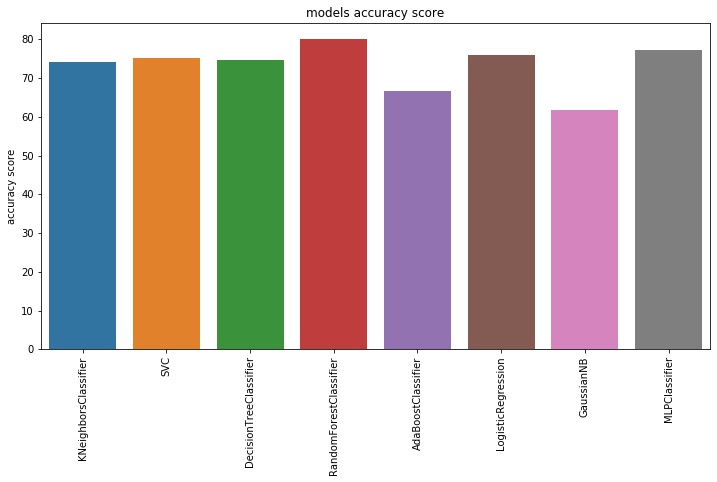

In [11]:
#Comparision graph between all models
y_pos = np.arange(len(names))
heights = [accuracy[0],accuracy[1],accuracy[2],accuracy[3],accuracy[4],accuracy[5],accuracy[6],accuracy[7]]

fig, ax=plt.subplots(1,1,figsize=(12,6))

plt.xticks(rotation='90')
sns.barplot(x=names, y=heights)
plt.ylabel('accuracy score')
plt.title('models accuracy score')